<a href="https://colab.research.google.com/github/dietadestina/PA_EVCast/blob/main/data_ev_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

ev_sales = pd.read_csv('https://raw.githubusercontent.com/dietadestina/AI4Jobs_program/refs/heads/main/ev_sales_by_makers_and_cat_15-24.csv')
ev_sales

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5


In [37]:
ev_sales['Maker'] = ev_sales['Maker'].replace('"', '', regex=True)
ev_sales


,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,VOLVO GROUP INDIA PVT LTD,0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5


In [38]:
ev_sales.isna().sum()

,0
Cat,0
Maker,0
2015,0
2016,0
2017,0
2018,0
2019,0
2020,0
2021,0
2022,0


In [39]:
ev_sales.duplicated().sum()

0

In [40]:
ev_sales.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,5.593074,35.533189,62.784271,93.624098,119.614719,89.300144,237.268398,736.315296,1103.343434,706.308081
std,62.430741,400.757230,496.932817,511.486338,692.529043,504.744348,1793.878376,5917.016908,9631.219039,7022.251339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,3.000000,6.000000,10.000000,7.000000,13.000000,39.000000,96.000000,79.000000
max,1708.000000,13401.000000,15094.000000,10816.000000,13213.000000,9543.000000,46260.000000,109398.000000,267355.000000,211273.000000


In [41]:
from scipy import stats
kolom_numerik = [str(year) for year in range(2015, 2025)]
ev_sales = ev_sales[(np.abs(stats.zscore(ev_sales[kolom_numerik])) < 3).all(axis=1)]
ev_sales

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,VOLVO GROUP INDIA PVT LTD,0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ev_sales[kolom_numerik] = scaler.fit_transform(ev_sales[kolom_numerik])
ev_sales

<ipython-input-42-de0f26db57bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_sales[kolom_numerik] = scaler.fit_transform(ev_sales[kolom_numerik])


,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,VOLVO GROUP INDIA PVT LTD,0.0,0.000000,0.030303,0.008734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3W,3EV INDUSTRIES PVT LTD,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.023539,0.029703,0.022666,0.002618
2,2W,3GB TECHNOLOGY PVT LTD,0.0,0.000000,0.000000,0.000728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3W,3GB TECHNOLOGY PVT LTD,0.0,0.001311,0.000978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3W,3S INDUSTRIES PRIVATE LIMITED,0.0,0.000000,0.000000,0.000000,0.025876,0.044715,0.009037,0.005179,0.011063,0.029673
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001599,0.001871,0.000462
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002662,0.000308
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002772
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000257


In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ev_sales.loc[:, 'Cat'] = le.fit_transform(ev_sales['Cat'])
ev_sales.loc[:, 'Maker'] = le.fit_transform(ev_sales['Maker'])
ev_sales.tail(10)

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1376,2,1168,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000076,0.000000,0.000000
1377,1,1169,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.024800,0.016984,0.029861,0.031418
1378,1,1170,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.029094,0.148180,0.183685
1379,1,1171,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000228,0.000457,0.002824
1380,1,1172,0.0,0.0,0.00391,0.008734,0.006469,0.00542,0.003153,0.001752,0.001539,0.000975
1381,0,1173,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.001599,0.001871,0.000462
1382,0,1174,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.002662,0.000308
1383,0,1175,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.002772
1384,0,1176,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000257
1385,1,1177,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000381,0.005448,0.003799


In [44]:
ev_sales = pd.melt(ev_sales, id_vars=['Cat', 'Maker'], var_name='Year', value_name='Value')
ev_sales.tail(10)

,Cat,Maker,Year,Value
13390,2,1168,2024,0.000000
13391,1,1169,2024,0.031418
13392,1,1170,2024,0.183685
13393,1,1171,2024,0.002824
13394,1,1172,2024,0.000975
13395,0,1173,2024,0.000462
13396,0,1174,2024,0.000308
13397,0,1175,2024,0.002772
13398,0,1176,2024,0.000257
13399,1,1177,2024,0.003799


In [45]:
ev_sales

,Cat,Maker,Year,Value
0,1,1101,2015,0.000000
1,1,0,2015,0.000000
2,0,1,2015,0.000000
3,1,1,2015,0.000000
4,1,2,2015,0.000000
...,...,...,...,...
13395,0,1173,2024,0.000462
13396,0,1174,2024,0.000308
13397,0,1175,2024,0.002772
13398,0,1176,2024,0.000257


In [46]:
from google.colab import files

ev_sales.to_csv('ev_sales.csv', index=False)
#files.download('ev_sales.csv')

In [47]:

from tensorflow.keras.optimizers import Adam

X = ev_sales[['Cat','Maker','Year']].values.astype(int)
y = ev_sales['Value'].values

# Ubah data menjadi bentuk yang dapat digunakan LSTM (samples, time steps, features)
X_lstm = []
y_lstm = []

# Menggunakan window size 3 untuk data sekuensial
window_size = 3
for i in range(window_size, len(X)):
    X_lstm.append(X[i-window_size:i])
    y_lstm.append(y[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Bagi data menjadi train dan test set
train_size = int(len(X_lstm) * 0.8)
X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0127 - val_loss: 0.0037
Epoch 2/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 3/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0058 - val_loss: 0.0037
Epoch 4/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0057 - val_loss: 0.0037
Epoch 5/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 6/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0063 - val_loss: 0.0040
Epoch 7/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0064 - val_loss: 0.0037
Epoch 8/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0054 - val_loss: 0.0037
Epoch 9/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 10/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 11/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 12/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.

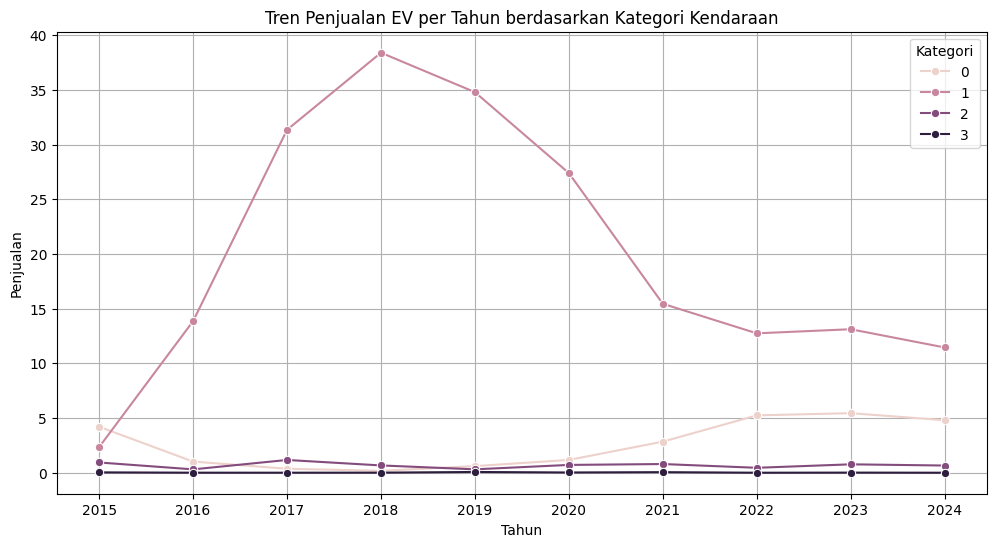

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

agg_sales_per_year = ev_sales.groupby(['Cat', 'Year'])['Value'].sum().reset_index()

# Visualisasi tren penjualan
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_sales_per_year, x='Year', y='Value', hue='Cat', marker='o')
plt.title('Tren Penjualan EV per Tahun berdasarkan Kategori Kendaraan')
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.legend(title='Kategori')
plt.grid(True)
plt.show()

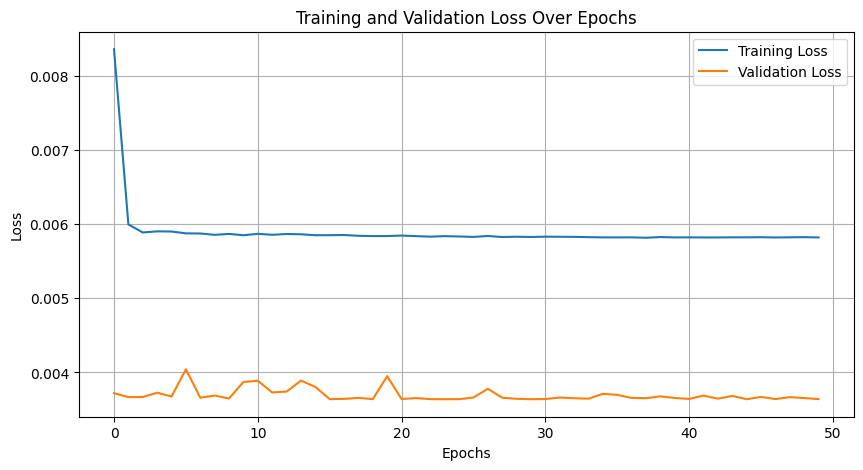

In [49]:
import matplotlib.pyplot as plt

# Misalkan history adalah hasil pelatihan model yang menyimpan informasi loss
# history.history['loss'] adalah loss untuk data training
# history.history['val_loss'] adalah loss untuk data validation

def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Memanggil fungsi visualisasi dengan history dari hasil training
plot_loss(history)

In [50]:
from sklearn.metrics import mean_absolute_percentage_error

# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Hitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape * 100:.2f}%')

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAPE: 3186398921214728.50%
